In [1]:
#pip install tensorflow

In [2]:
#pip install keras

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Generate a sample time series
np.random.seed(0)
n = 200
t = np.arange(n)
data = pd.Series(0.5 * t + 10 * np.sin(0.1 * t) + np.random.normal(size=n))
print(len(data))

200


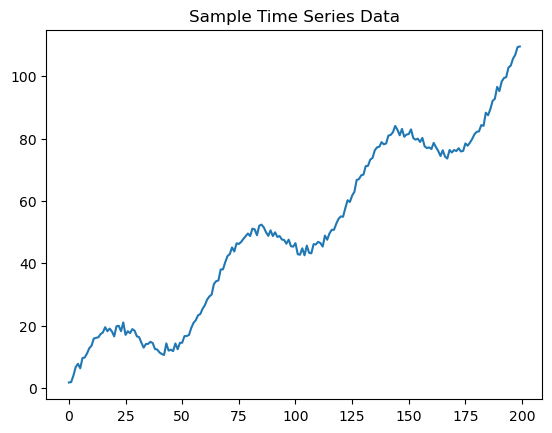

In [5]:
# Plot the time series
import matplotlib.pyplot as plt
plt.plot(data)
plt.title('Sample Time Series Data')
plt.show()


In [6]:
# Fit ARIMA model
arima_order = (5, 1, 0)
arima_model = ARIMA(data, order=arima_order)
arima_fit = arima_model.fit()

# Get ARIMA residuals
arima_residuals = arima_fit.resid


In [7]:
# Scale residuals
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(arima_residuals.values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_residuals, seq_length)


In [8]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=16, verbose=1)


C:\Users\hunsu\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1732
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0803 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

In [9]:
# Forecast with ARIMA model
arima_forecast = arima_fit.forecast(steps=10)

# Prepare input for LSTM model
last_sequence = scaled_residuals[-seq_length:]
input_data = np.array([last_sequence])

# Forecast residuals with LSTM model
lstm_forecast = model.predict(input_data)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Combine forecasts
combined_forecast = arima_forecast + lstm_forecast.flatten()

# Print combined forecast
print("ARIMA Forecast:", arima_forecast)
print("LSTM Residual Forecast:", lstm_forecast.flatten())
print("Combined Forecast:", combined_forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
ARIMA Forecast: 200    111.112756
201    112.531329
202    113.435550
203    114.710634
204    115.492130
205    116.625571
206    117.511605
207    118.308037
208    119.193277
209    119.904234
Name: predicted_mean, dtype: float64
LSTM Residual Forecast: [-0.21518485]
Combined Forecast: 200    110.897571
201    112.316145
202    113.220365
203    114.495449
204    115.276945
205    116.410386
206    117.296420
207    118.092852
208    118.978093
209    119.689049
Name: predicted_mean, dtype: float64
